# **1. Data Preparation**

## **a. Data Loading**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/HousePricePrediction.csv")
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


## **b. Data Cleaning**

### i. Handling Missing Values




In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: fill with median or drop)
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median(), inplace=True)
df['LotConfig'].fillna(df['LotConfig'].mode()[0], inplace=True)
# Continue with other columns as needed


Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


### ii. Remove Duplicates

In [ ]:
df.drop_duplicates(inplace=True)


### iii. Convert Categorical Coloumns

In [ ]:
# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], drop_first=True)


### iv. Feature Selection

In [ ]:
# Define features and target variable
X = df.drop(['Id', 'SalePrice'], axis=1)  # Drop non-numeric columns and target variable
y = df['SalePrice']

# Handle missing values in features and target variable
X.fillna(X.median(), inplace=True)
y = y.dropna()  # Handle missing values in target variable

# Align X and y after handling missing values
X = X.loc[y.index]



### v. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **2. Feature Analysis**


## a. Correlation Analysis

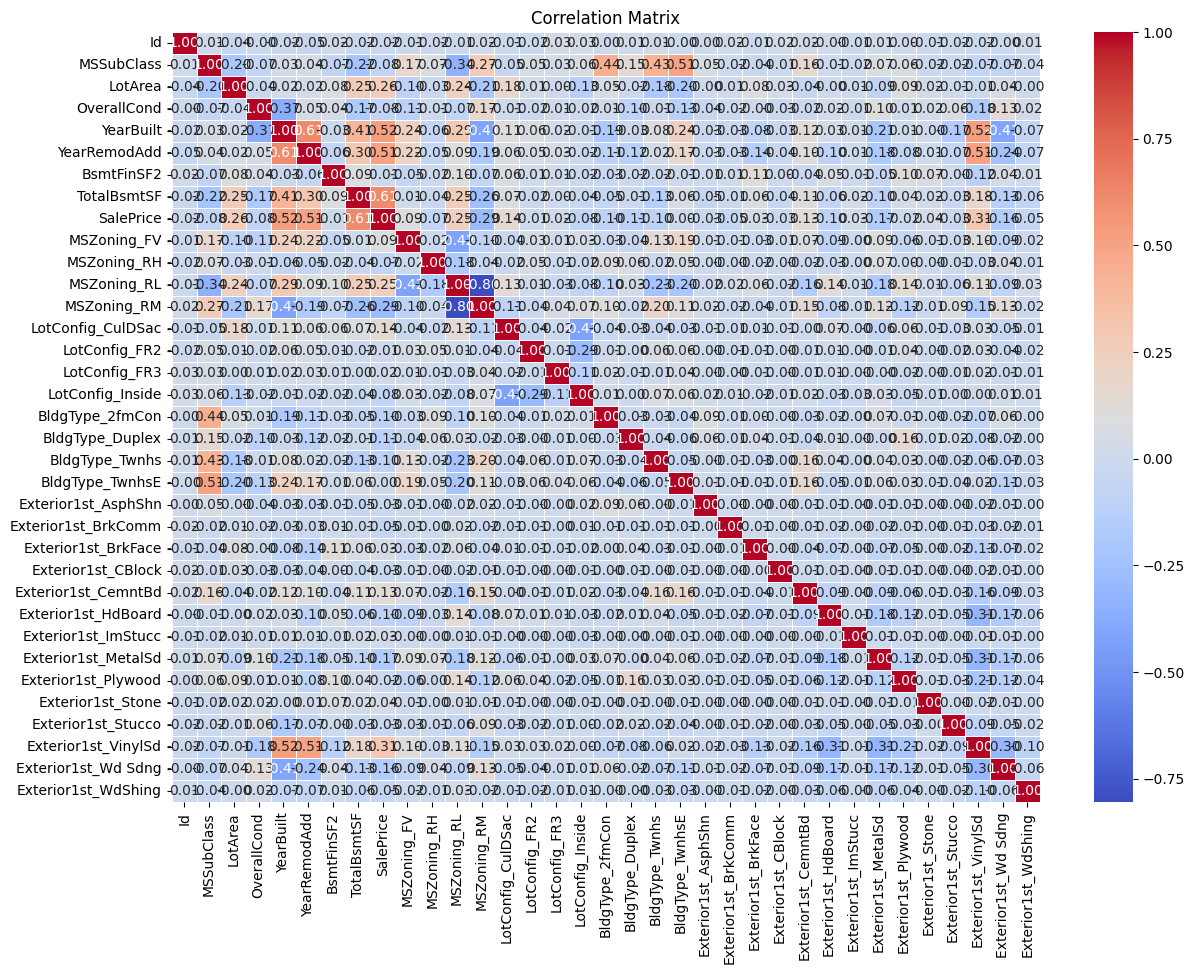

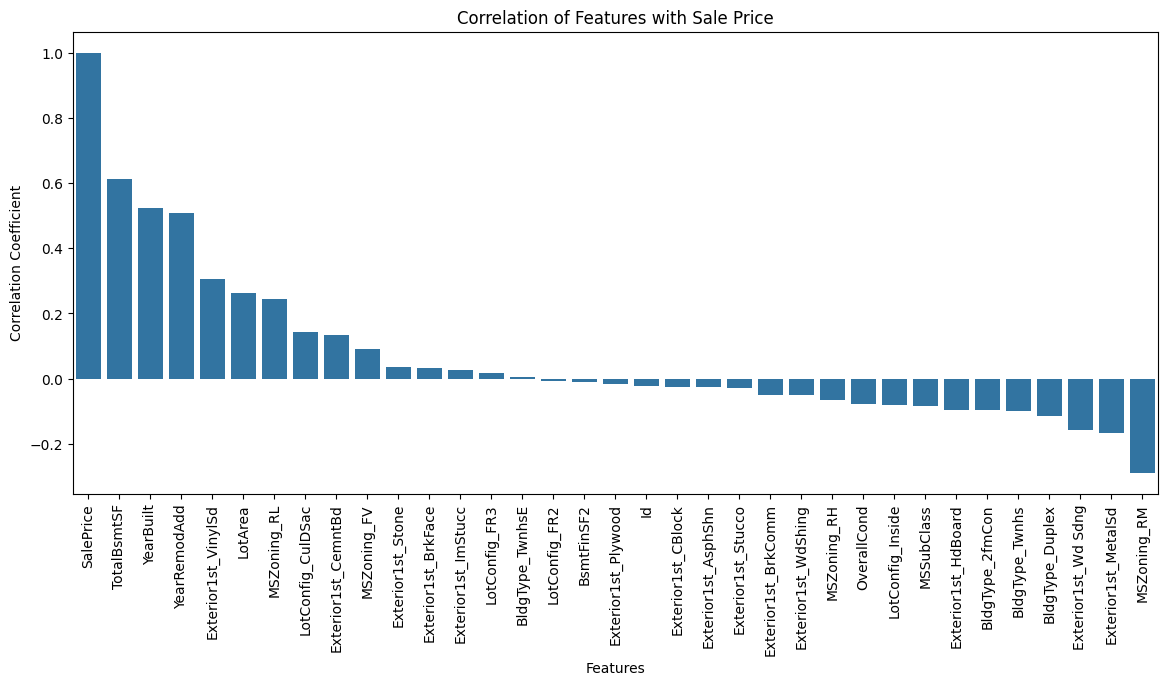

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Focus on features correlated with the target variable
plt.figure(figsize=(14, 6))
sorted_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
sns.barplot(x=sorted_corr.index, y=sorted_corr.values)
plt.title('Correlation of Features with Sale Price')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


# **3. Building the Machine Learning Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

# **4. Model Evaluation and Fine-tuning**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')




Mean Squared Error: 2918458029.59
R-squared: 0.62


# **5. Comparing various Algorithms**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

# Dictionary to store performance metrics
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[name] = {
        'Mean Squared Error': mse,
        'R-squared': r2
    }

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  Mean Squared Error: {metrics['Mean Squared Error']:.2f}")
    print(f"  R-squared: {metrics['R-squared']:.2f}")
    print()


Model: Linear Regression
  Mean Squared Error: 2918458029.59
  R-squared: 0.62

Model: Decision Tree Regressor
  Mean Squared Error: 2495849275.85
  R-squared: 0.67

Model: Random Forest Regressor
  Mean Squared Error: 1407596763.42
  R-squared: 0.82

Model: Gradient Boosting Regressor
  Mean Squared Error: 1310612221.60
  R-squared: 0.83

Model: Support Vector Regressor
  Mean Squared Error: 7859491719.59
  R-squared: -0.02



# **6. Declaring the best Model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initializing
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluation
mse_best = mean_squared_error(y_test, y_pred)
r2_best = r2_score(y_test, y_pred)

print("Best Model: Gradient Boosting Regressor")
print(f"  Mean Squared Error: {mse_best:.2f}")
print(f"  R-squared: {r2_best:.2f}")

# Saving the model
import joblib

# Saving the best model to a file
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")


Best Model: Gradient Boosting Regressor
  Mean Squared Error: 1310612221.60
  R-squared: 0.83
Best model saved as 'best_model.pkl'
